## Goal - 
- compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500, 15), (12500, 15), (37500,), (12500,))

# 1. LogisticRegression with Sklearn - SGDClassifier

In [4]:
clf = SGDClassifier(eta0=0.0001, alpha=0.0001, loss = 'log', verbose=2, random_state=15,
                    penalty= 'l2', learning_rate= 'constant', tol= 1e-3)

In [5]:
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.316709, T: 37500, Avg. loss: 0.456075
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.474481, T: 75000, Avg. loss: 0.394632
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.586473, T: 112500, Avg. loss: 0.385316
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.667137, T: 150000, Avg. loss: 0.381770
Total training time: 0.12 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.723029, T: 187500, Avg. loss: 0.380076
Total training time: 0.15 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.766657, T: 225000, Avg. loss: 0.379137
Total training time: 0.17 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.800738, T: 262500, Avg. loss: 0.378783
Total training time: 0.21 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 15, Bias: -0.825219, T: 300000, Avg. loss: 0.378431
Total training time: 0.23 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.843961, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [16]:
clf.coef_, clf.coef_.shape, clf.intercept_[0]

(array([[-0.42667592,  0.1816455 , -0.14415724,  0.34206816, -0.20533706,
          0.56175067, -0.45319481, -0.09094483,  0.21485474,  0.17900476,
          0.19209177,  0.00387419, -0.08029135,  0.33539726,  0.03246409]]),
 (1, 15),
 -0.8580437843819938)

# Implementing Custom SGD and LogisticRegression - SGDClassifier

In [7]:
# sigmoid function
def sigmoid(x):
    lst = []
    for i in range(len(x)):
        lst.append(1 / (1 + math.exp(-x[i])))
    return np.array(lst)

In [8]:
# computing log_loss
def logloss(y_true, y_prob):
    loss = (y_true) * np.log10(y_prob) + ((1-y_true) * np.log10((1-y_prob)))
    loss = (-1*np.nanmean(loss))
    return loss

In [55]:
# 2. Initialized the weight_vector and intercept term randomly
alpha = 0.0001         # Hyper-parameter
eta0 = 0.0001          # Learning rate
w = np.zeros_like(X_train[0])
bi = 0
N = len(X_train)
batch_size = 1
epoch = 15             # Max_epoch
log_loss_lst_Train = []
log_loss_lst_Test = []

# 3.i. initial log_loss for TRAIN
y_proba = sigmoid(np.dot(X_train, w) + bi)
log_loss_lst_Train.append(logloss(y_train, y_proba))

# 3.ii. initial log_loss for TEST
y_proba = sigmoid(np.dot(X_test, w) + bi)
log_loss_lst_Test.append(logloss(y_test, y_proba))

for k in range(epoch):
    for i in range(N):
        batch_list = np.random.randint(0,N, batch_size)
        
        y_proba = sigmoid(np.dot(X_train[batch_list], w) + bi)
        
        # 4.i. update function for 'wi'
        wi = (1-(eta0*alpha/N))*w + eta0 *(np.dot(X_train[batch_list].T, (y_train[batch_list] - y_proba)))
        
        # 4.ii. update function for 'bi'
        bi = np.mean(bi + eta0*(y_train[batch_list] - y_proba))
        
        w = wi
        '''
        # 4.iii. computing log_loss for whole train_set
        y_proba = sigmoid(np.dot(X_train, w) + bi)
        log_loss_iter_train.append(logloss(y_train, y_proba))
        
        # 4.iv. computing log_loss for whole train_set
        y_proba = sigmoid(np.dot(X_test, w) + bi)
        log_loss_iter_train.append(logloss(y_test, y_proba))
        
        
        # Stopping iteration
        '''
        if bi <= clf.intercept_:
            break
    # 5.i. computing log_loss for whole train_set
    y_proba = sigmoid(np.dot(X_train, w) + bi)
    log_loss_lst_Train.append(logloss(y_train, y_proba))
    
    # 5.ii. computing log_loss for whole train_set
    y_proba_test = sigmoid(np.dot(X_test, w) + bi)
    log_loss_lst_Test.append(logloss(y_test, y_proba_test))
    
    print('------------ epoch {} ------------'.format(k+1))
    print('Train_loss =', log_loss_lst_Train[k+1], 'Test_loss =',log_loss_lst_Test[k+1], 'bias =',bi, '\n')
    
    if bi <= clf.intercept_:
        break

------------ epoch 1 ------------
Train_loss = 0.1752946598710259 Test_loss = 0.17597161510070655 bias = -0.31885491161447194 

------------ epoch 2 ------------
Train_loss = 0.16875109444989128 Test_loss = 0.1695854654026965 bias = -0.4844985839105372 

------------ epoch 3 ------------
Train_loss = 0.16625060822170554 Test_loss = 0.16761863603734678 bias = -0.5881353214130431 

------------ epoch 4 ------------
Train_loss = 0.16521179032349723 Test_loss = 0.16656206662053893 bias = -0.6647010963994319 

------------ epoch 5 ------------
Train_loss = 0.16477032575776826 Test_loss = 0.16608314326953194 bias = -0.7214618200168553 

------------ epoch 6 ------------
Train_loss = 0.1644133010337416 Test_loss = 0.16596191837057567 bias = -0.7689725879534853 

------------ epoch 7 ------------
Train_loss = 0.16427883496114218 Test_loss = 0.16570308014268142 bias = -0.8104903396049281 

------------ epoch 8 ------------
Train_loss = 0.1643589138053186 Test_loss = 0.16601451634677106 bias = -

In [47]:
if np.absolute(np.mean(np.absolute(w) - np.absolute(clf.coef_))) <= 0.0009:
            break

-0.0008866396666684818

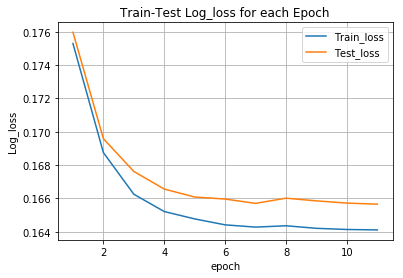

In [56]:
# 6. Plotting the train and test loss with each epoch number
plt.plot(range(1, k+2), log_loss_lst_Train[1:],  label = 'Train_loss')
plt.plot(range(1, k+2), log_loss_lst_Test[1:],  label = 'Test_loss')
plt.xlabel('epoch')
plt.ylabel('Log_loss')
plt.title('Train-Test Log_loss for each Epoch')
plt.grid()
plt.legend()
plt.show()

# Comparing weight vector and bias term

In [57]:
# 7. Comparing weight vector and the intercept term with sklearn's output
w, bi, clf.coef_, clf.intercept_

(array([-0.4273222 ,  0.18119431, -0.1480419 ,  0.33481253, -0.19988765,
         0.55881995, -0.45102735, -0.08348103,  0.21477186,  0.17715306,
         0.1904157 ,  0.00401597, -0.07723124,  0.32884329,  0.02823938]),
 -0.8580489314545229,
 array([[-0.42667592,  0.1816455 , -0.14415724,  0.34206816, -0.20533706,
          0.56175067, -0.45319481, -0.09094483,  0.21485474,  0.17900476,
          0.19209177,  0.00387419, -0.08029135,  0.33539726,  0.03246409]]),
 array([-0.85804378]))

In [59]:
# 8. Difference between weight/bias terms of manual SGD and Sklearn's SGD must be 10^-3
w - clf.coef_, bi - clf.intercept_

(array([[-6.46277182e-04, -4.51191332e-04, -3.88466770e-03,
         -7.25563483e-03,  5.44940732e-03, -2.93072604e-03,
          2.16746620e-03,  7.46379222e-03, -8.28811273e-05,
         -1.85170097e-03, -1.67606764e-03,  1.41781268e-04,
          3.06010486e-03, -6.55397496e-03, -4.22470908e-03]]),
 array([-5.14707253e-06]))